## Time Series

In [1]:
#Imports

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import nasdaqdatalink
import statsmodels

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


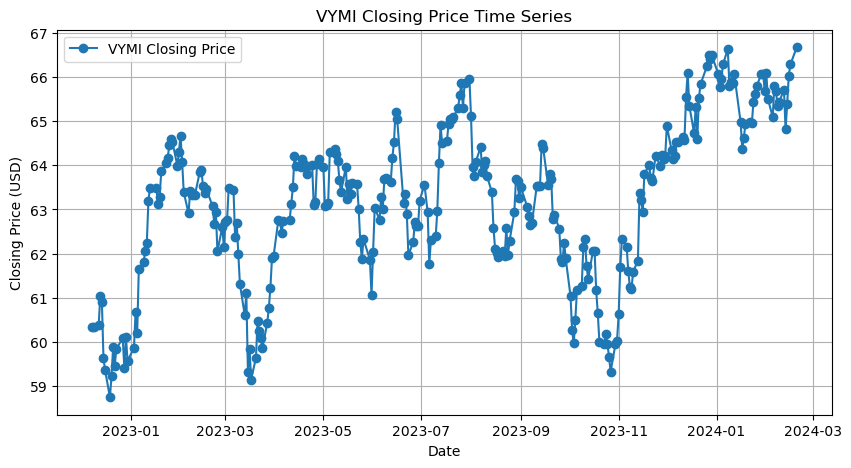

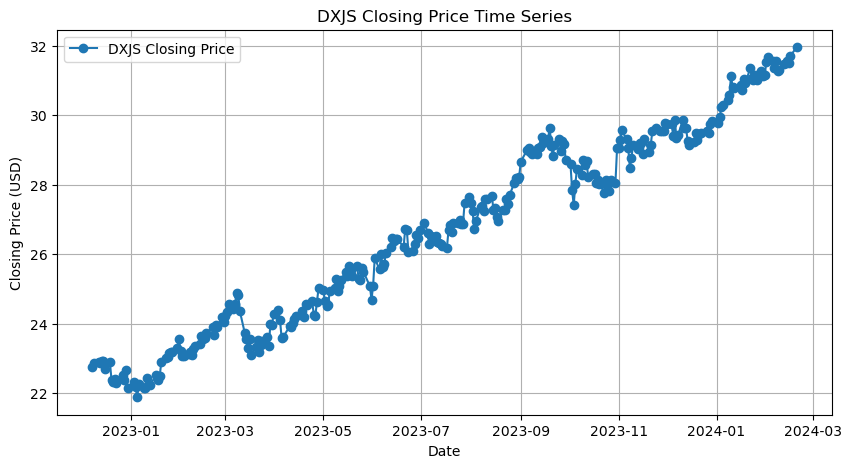

In [2]:
# Download historical data using yfinance
df_VYMI = yf.download("VYMI", period="300d", interval="1d")
df_DXJS = yf.download("DXJS", period="300d", interval="1d")
        
# Plot the closing price time series
plt.figure(figsize=(10, 5))
plt.plot(df_VYMI.index, df_VYMI['Close'], label='VYMI Closing Price', marker='o')
plt.title('VYMI Closing Price Time Series')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_DXJS.index, df_DXJS['Close'], label='DXJS Closing Price', marker='o')
plt.title('DXJS Closing Price Time Series')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## Moving Averages

Define mathematically the moving average of the price time series with an arbitrary time- window τ


In [3]:
# Define the time-windows (τ)
windows = [5, 20, 60]

# Compute moving averages for each window
for window in windows:
    ma_values = []  # List to store moving average values
    for i in range(len(df_VYMI)):
        if i < window:
            ma_values.append(df_VYMI['Close'].iloc[:i+1].mean())  # Compute mean of available values
        else:
            ma_values.append(df_VYMI['Close'].iloc[i-window+1:i+1].mean())  # Compute mean of last τ values
    df_VYMI[f'MA_{window}'] = ma_values
    
for window in windows:
    ma_values = []  
    for i in range(len(df_DXJS)):
        if i < window:
            ma_values.append(df_DXJS['Close'].iloc[:i+1].mean()) 
        else:
            ma_values.append(df_DXJS['Close'].iloc[i-window+1:i+1].mean())
    df_DXJS[f'MA_{window}'] = ma_values

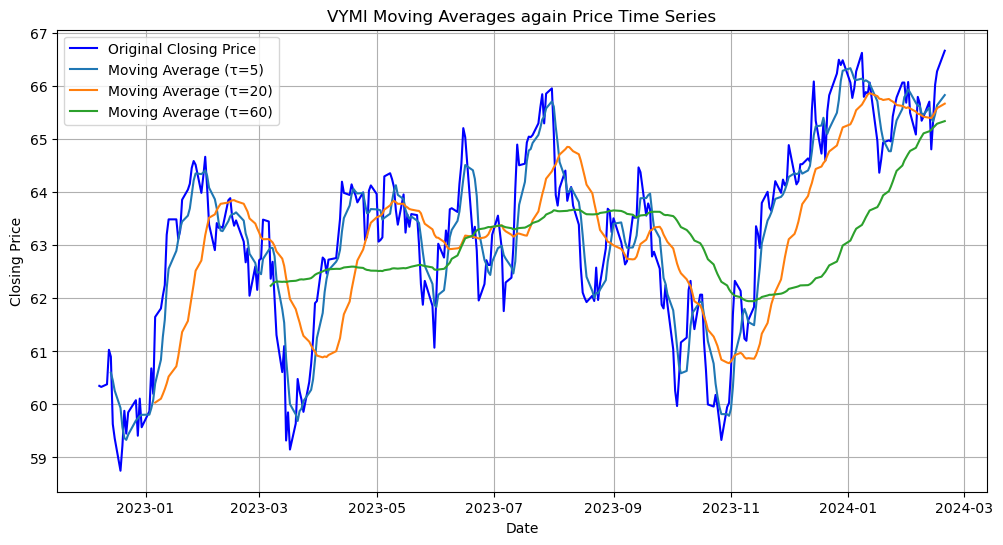

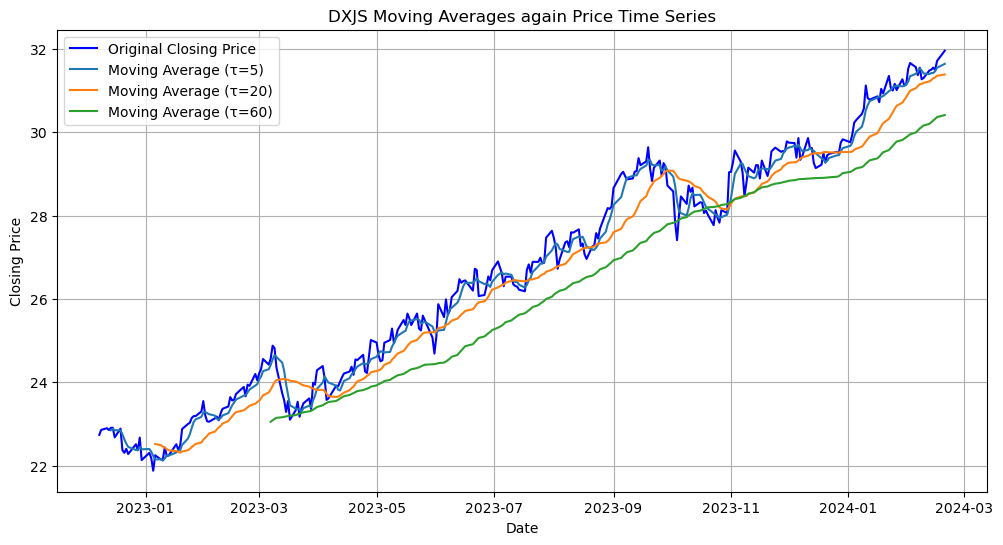

In [4]:
# Plot the closing price along with moving averages for VYMI
plt.figure(figsize=(12, 6))
plt.plot(df_VYMI.index, df_VYMI['Close'], label='Original Closing Price', color='blue')

plt.plot(df_VYMI.index[4:], df_VYMI['MA_5'][4:], label='Moving Average (τ=5)')
plt.plot(df_VYMI.index[19:], df_VYMI['MA_20'][19:], label='Moving Average (τ=20)')
plt.plot(df_VYMI.index[59:], df_VYMI['MA_60'][59:], label='Moving Average (τ=60)')

plt.title('VYMI Moving Averages again Price Time Series')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot the closing price along with moving averages for DXJS
plt.figure(figsize=(12, 6))
plt.plot(df_DXJS.index, df_DXJS['Close'], label='Original Closing Price', color='blue')

plt.plot(df_DXJS.index[4:], df_DXJS['MA_5'][4:], label='Moving Average (τ=5)')
plt.plot(df_DXJS.index[19:], df_DXJS['MA_20'][19:], label='Moving Average (τ=20)')
plt.plot(df_DXJS.index[59:], df_DXJS['MA_60'][59:], label='Moving Average (τ=60)')

plt.title('DXJS Moving Averages again Price Time Series')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Compute linear returns
df_VYMI['Linear_Return'] = df_VYMI['Close'].pct_change()
df_DXJS['Linear_Return'] = df_DXJS['Close'].pct_change()

# Compute log returns
df_VYMI['Log_Return'] = np.log(1 + df_VYMI['Linear_Return'])
df_DXJS['Log_Return'] = np.log(1 + df_DXJS['Linear_Return'])


# Drop the first row since it will have NaN value
df_VYMI.dropna(inplace=True)
df_DXJS.dropna(inplace=True)

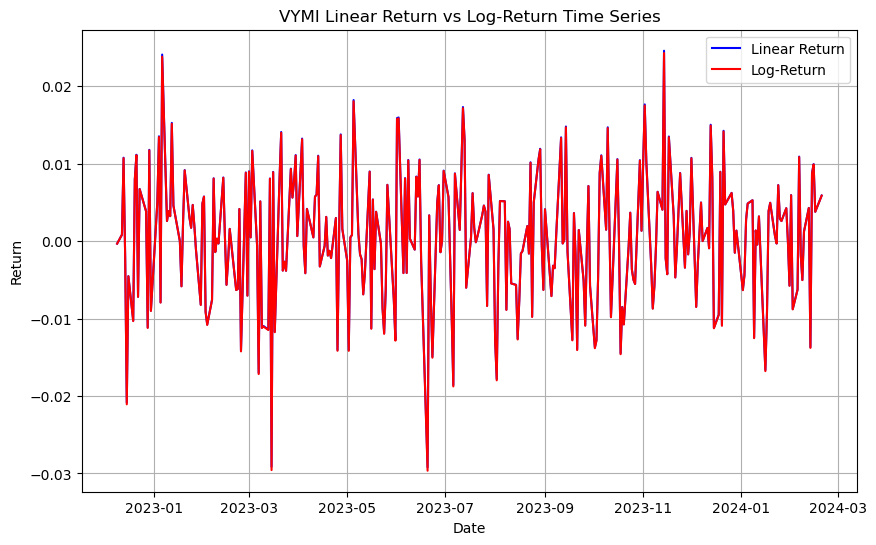

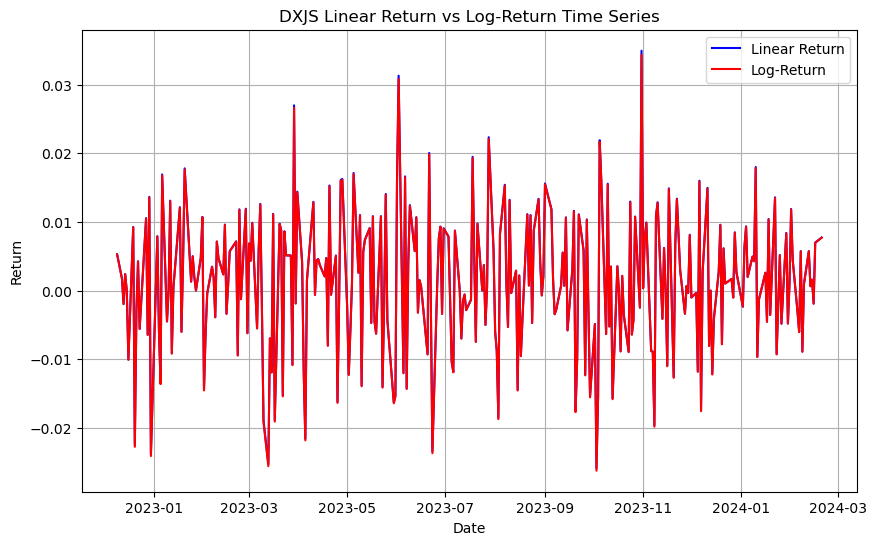

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df_VYMI.index, df_VYMI['Linear_Return'], label='Linear Return', color='blue')
plt.plot(df_VYMI.index, df_VYMI['Log_Return'], label='Log-Return', color='red')
plt.title('VYMI Linear Return vs Log-Return Time Series')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_DXJS.index, df_DXJS['Linear_Return'], label='Linear Return', color='blue')
plt.plot(df_DXJS.index, df_DXJS['Log_Return'], label='Log-Return', color='red')
plt.title('DXJS Linear Return vs Log-Return Time Series')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

## Time Series Analysis

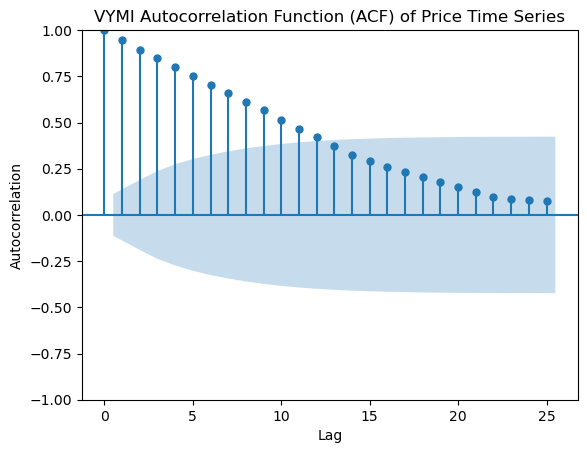

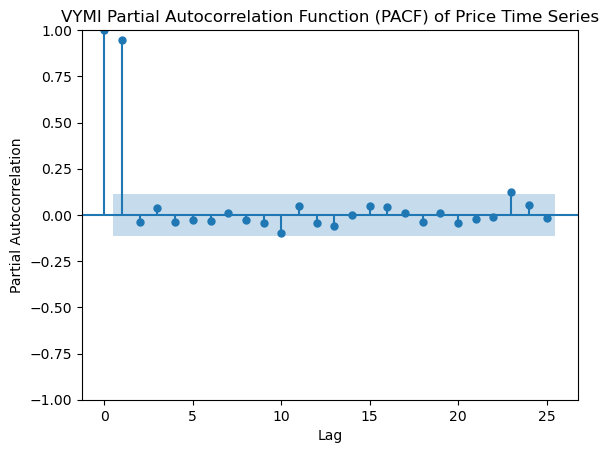

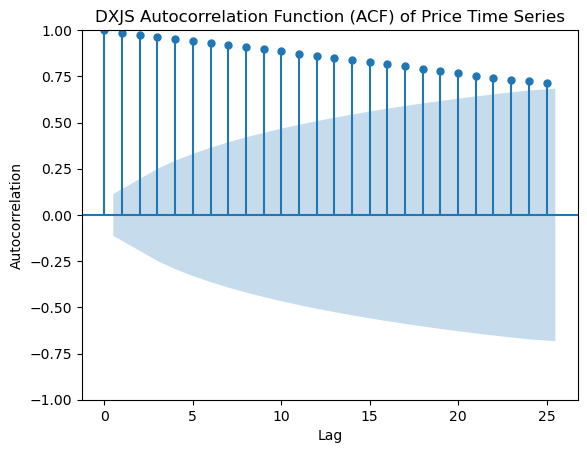

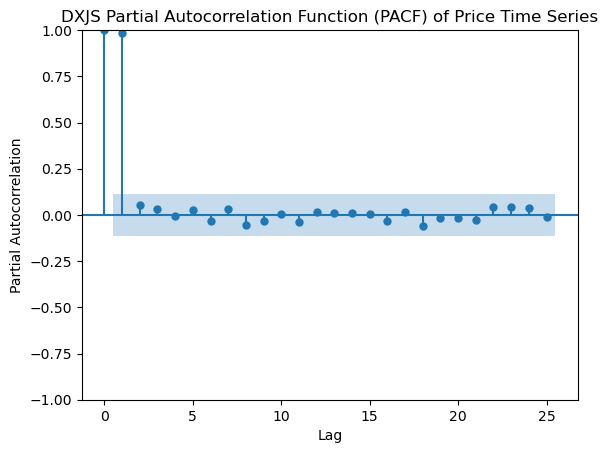

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(df_VYMI['Close'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('VYMI Autocorrelation Function (ACF) of Price Time Series')
plt.show()

plot_pacf(df_VYMI['Close'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('VYMI Partial Autocorrelation Function (PACF) of Price Time Series')
plt.show()

plot_acf(df_DXJS['Close'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('DXJS Autocorrelation Function (ACF) of Price Time Series')
plt.show()

plot_pacf(df_DXJS['Close'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('DXJS Partial Autocorrelation Function (PACF) of Price Time Series')
plt.show()

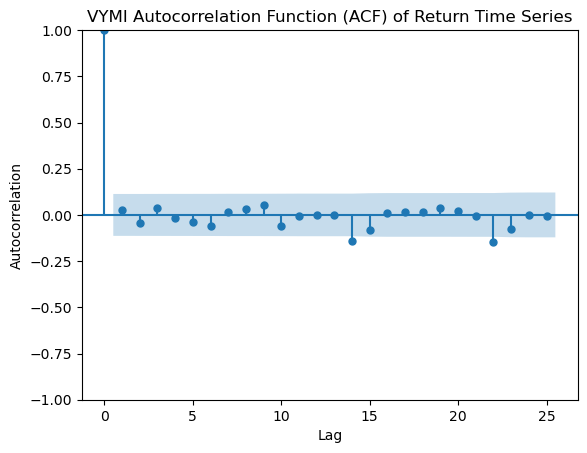

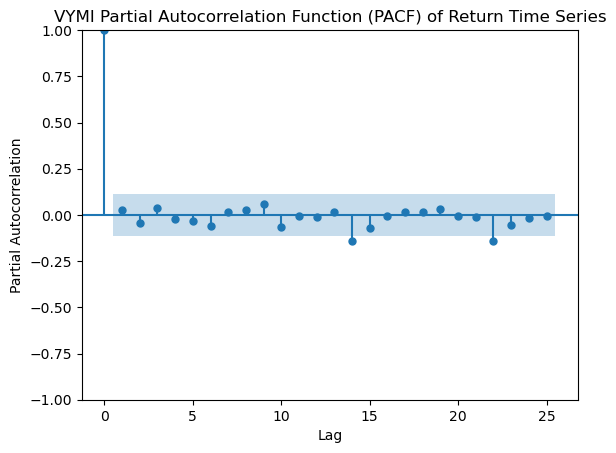

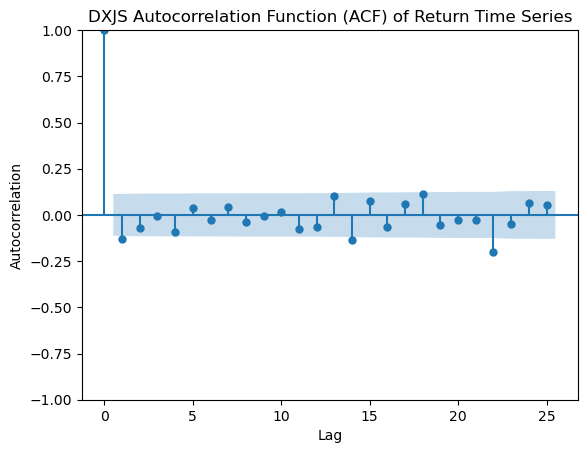

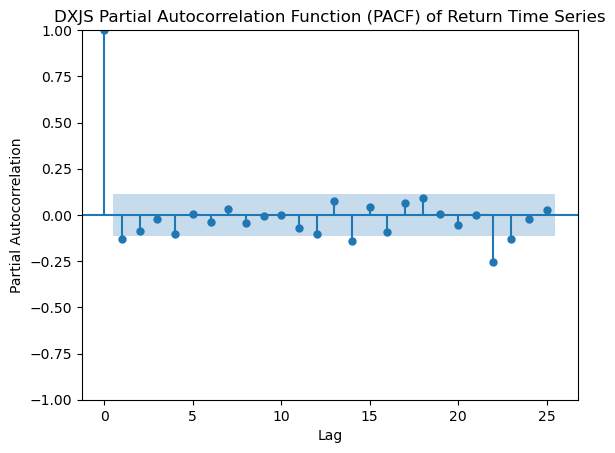

In [9]:
#Return time series computed using Log_Return

plot_acf(df_VYMI['Log_Return'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('VYMI Autocorrelation Function (ACF) of Return Time Series')
plt.show()

plot_pacf(df_VYMI['Log_Return'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('VYMI Partial Autocorrelation Function (PACF) of Return Time Series')
plt.show()

plot_acf(df_DXJS['Log_Return'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('DXJS Autocorrelation Function (ACF) of Return Time Series')
plt.show()

plot_pacf(df_DXJS['Log_Return'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('DXJS Partial Autocorrelation Function (PACF) of Return Time Series')
plt.show()

## Gaussianity and Stationarity test

A common statistical test used to assess whether a dataset follows a Gaussian distribution is the Shapiro-Wilk test.

In [10]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
statistic, p_value = shapiro(df_VYMI['Log_Return'])

# Print the results
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value > alpha:
    print("The VYMI return time series follows a Gaussian (normal) distribution (fail to reject H0)")
else:
    print("The VYMI return time series does not follow a Gaussian (normal) distribution (reject H0)")
    

statistic, p_value = shapiro(df_DXJS['Log_Return'])

print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("The DXJS return time series follows a Gaussian (normal) distribution (fail to reject H0)")
else:
    print("The DXJS return time series does not follow a Gaussian (normal) distribution (reject H0)")


Shapiro-Wilk Test Statistic: 0.9917458891868591
p-value: 0.09377645701169968
The VYMI return time series follows a Gaussian (normal) distribution (fail to reject H0)
Shapiro-Wilk Test Statistic: 0.9936865568161011
p-value: 0.24547678232192993
The DXJS return time series follows a Gaussian (normal) distribution (fail to reject H0)


In [11]:
from scipy.stats import kstest

statistic, p_value = kstest(df_VYMI['Log_Return'], 'norm')

print("Kolmogorov-Smirnov Test Statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("The VYMI return time series follows a normal distribution (fail to reject H0)")
else:
    print("The VYMI return time series does not follow a normal distribution (reject H0)")
    

statistic, p_value = kstest(df_DXJS['Log_Return'], 'norm')

print("Kolmogorov-Smirnov Test Statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05 
if p_value > alpha:
    print("The DXJS return time series follows a normal distribution (fail to reject H0)")
else:
    print("The DXJS return time series does not follow a normal distribution (reject H0)")

Kolmogorov-Smirnov Test Statistic: 0.49031369566358896
p-value: 8.192212909399691e-67
The VYMI return time series does not follow a normal distribution (reject H0)
Kolmogorov-Smirnov Test Statistic: 0.4895356162089076
p-value: 1.3736086285355721e-66
The DXJS return time series does not follow a normal distribution (reject H0)


Augmented Dickey-Fuller (ADF) test. This test evaluates whether a time series is stationary or non-stationary by testing for the presence of a unit root in the autoregressive model.


In [15]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df_VYMI['Log_Return'])

# Print the test statistic and p-value
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Interpret the results
alpha = 0.05  # Significance level
if result[1] < alpha:
    print("The return time series is stationary (reject H0)")
else:
    print("The return time series is non-stationary (fail to reject H0)")


result = adfuller(df_DXJS['Log_Return'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

alpha = 0.05 
if result[1] < alpha:
    print("The return time series is stationary (reject H0)")
else:
    print("The return time series is non-stationary (fail to reject H0)")

ADF Statistic: -16.700398751231067
p-value: 1.462891395622659e-29
The return time series is stationary (reject H0)
ADF Statistic: -14.047711092822546
p-value: 3.2185308157542766e-26
The return time series is stationary (reject H0)


## Cointegration

Engle-Granger cointegration test. This test assesses whether there exists a long-run relationship between two non-stationary time series by testing for a linear combination of them that is stationary.

In [13]:
from statsmodels.tsa.stattools import coint

# Perform Engle-Granger cointegration test
result = coint(df_VYMI['Close'], df_DXJS['Close'])

# Print the test statistic and p-value
print("Cointegration Test Statistic:", result[0])
print("p-value:", result[1])

# Interpret the results
alpha = 0.05  # Significance level
if result[1] < alpha:
    print("The two ETF price time series are cointegrated (reject H0)")
else:
    print("The two ETF price time series are not cointegrated (fail to reject H0)")


Cointegration Test Statistic: -2.7272761683836526
p-value: 0.18992222668032605
The two ETF price time series are not cointegrated (fail to reject H0)


In [14]:
result = coint(df_VYMI['Log_Return'], df_DXJS['Log_Return'])

print("Cointegration Test Statistic:", result[0])
print("p-value:", result[1])

alpha = 0.05
if result[1] < alpha:
    print("The two ETF price time series are cointegrated (reject H0)")
else:
    print("The two ETF price time series are not cointegrated (fail to reject H0)")


Cointegration Test Statistic: -16.895718812954588
p-value: 7.544953311541174e-29
The two ETF price time series are cointegrated (reject H0)
